In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [15]:
df_credits=pd.read_csv("C:/Users/megha/Downloads/tmdb_5000_credits.csv")
df_credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [16]:
df_movies=pd.read_csv("C:/Users/megha/Downloads/tmdb_5000_movies.csv")
df_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [17]:
print('Credit dataset shape', df_credits.shape)
print('Movie dataset shape', df_movies.shape)
print('Credit dataset size', df_credits.size)
print('Movie dataset size', df_movies.size)
print("* "*100)
print(df_credits.info())
print("* "*100)
print(df_movies.info())

Credit dataset shape (4803, 4)
Movie dataset shape (4803, 20)
Credit dataset size 19212
Movie dataset size 96060
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
None
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 

In [18]:
df = df_movies.merge(df_credits,on='title')
print(df)

print(df.info())

print(df.describe())

print(df.isnull().sum())
print(df.nunique())
print(df.duplicated().sum())
print(df.columns)

         budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4804     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4805       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4806          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4807          0                                                 []   
4808          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.

In [19]:
from collections import Counter
def count_values(column):
    items = [item for sublist in df[column].dropna().apply(lambda x: x.split(',')) for item in sublist]
    return dict(Counter(items))

genres_count = count_values('genres')
genres_df = pd.DataFrame(genres_count.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
print(genres_df)

keywords_count = count_values('keywords')
keywords_df = pd.DataFrame(keywords_count.items(), columns=['Keyword', 'Count']).sort_values(by='Count', ascending=False)
print(keywords_df)

prod_companies_count = count_values('production_companies')
prod_companies_df = pd.DataFrame(prod_companies_count.items(), columns=['Company', 'Count']).sort_values(by='Count', ascending=False)
print(prod_companies_df)

spoken_languages_count = count_values('spoken_languages')
spoken_languages_df = pd.DataFrame(spoken_languages_count.items(), columns=['Language', 'Count']).sort_values(by='Count', ascending=False)
print(spoken_languages_df)

cast_count = count_values('cast')
cast_df = pd.DataFrame(cast_count.items(), columns=['Cast', 'Count']).sort_values(by='Count', ascending=False).head(10)
print(cast_df)

crew_count = count_values('crew')
crew_df = pd.DataFrame(crew_count.items(), columns=['Crew', 'Count']).sort_values(by='Count', ascending=False).head(10)
print(crew_df)

                    Genre  Count
15       "name": "Drama"}   1504
32      "name": "Comedy"}   1212
33             [{"id": 18   1209
14              {"id": 18   1091
16              {"id": 53   1081
..                    ...    ...
75          [{"id": 10770      4
76    "name": "TV Movie"}      4
77           {"id": 10770      4
78   "name": "TV Movie"}]      4
80          [{"id": 10769      2

[81 rows x 2 columns]
                           Keyword  Count
991                             []    412
203                  {"id": 179431    292
854                  {"id": 187056    281
3918                  {"id": 10183    233
1894    "name": "woman director"}]    231
...                            ...    ...
11595            "name": "skype"}]      1
11598                  {"id": 5289      1
11599      "name": "private life"}      1
11603                  {"id": 2406      1
21985       "name": "dream girl"}]      1

[21986 rows x 2 columns]
                                              Compa

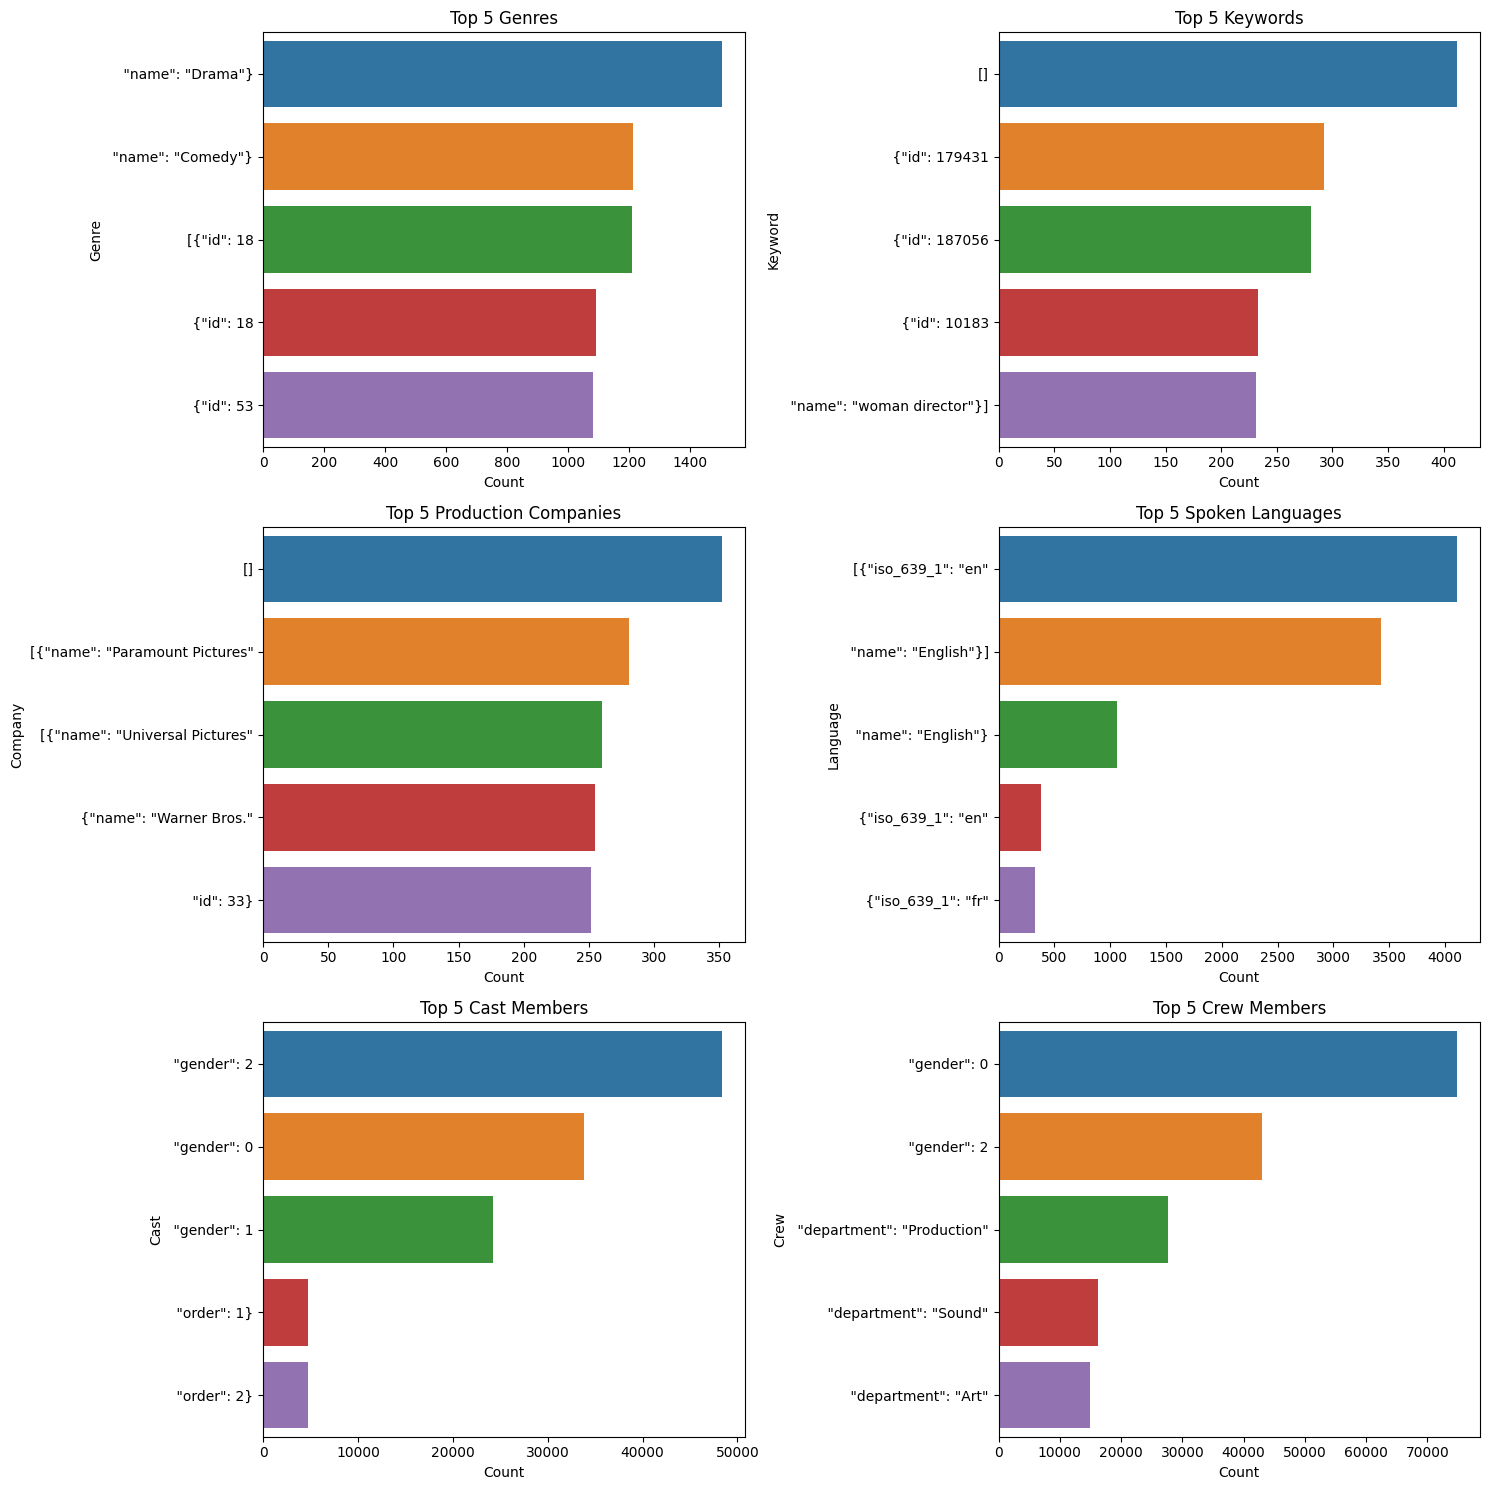

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.barplot(x='Count', y='Genre', data=genres_df.head(), ax=axes[0, 0])
axes[0, 0].set_title('Top 5 Genres')

sns.barplot(x='Count', y='Keyword', data=keywords_df.head(), ax=axes[0, 1])
axes[0, 1].set_title('Top 5 Keywords')

sns.barplot(x='Count', y='Company', data=prod_companies_df.head(), ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Production Companies')

sns.barplot(x='Count', y='Language', data=spoken_languages_df.head(), ax=axes[1, 1])
axes[1, 1].set_title('Top 5 Spoken Languages')

sns.barplot(x='Count', y='Cast', data=cast_df.head(), ax=axes[2, 0])
axes[2, 0].set_title('Top 5 Cast Members')

sns.barplot(x='Count', y='Crew', data=crew_df.head(), ax=axes[2, 1])
axes[2, 1].set_title('Top 5 Crew Members')

plt.tight_layout()
plt.show()

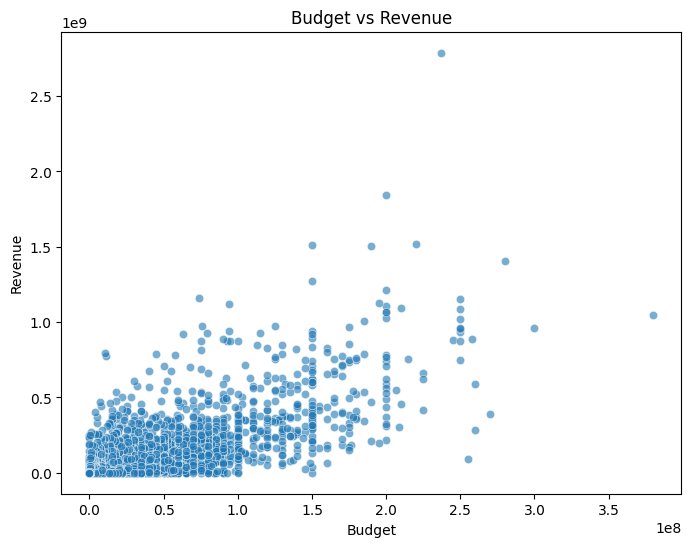

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.6)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

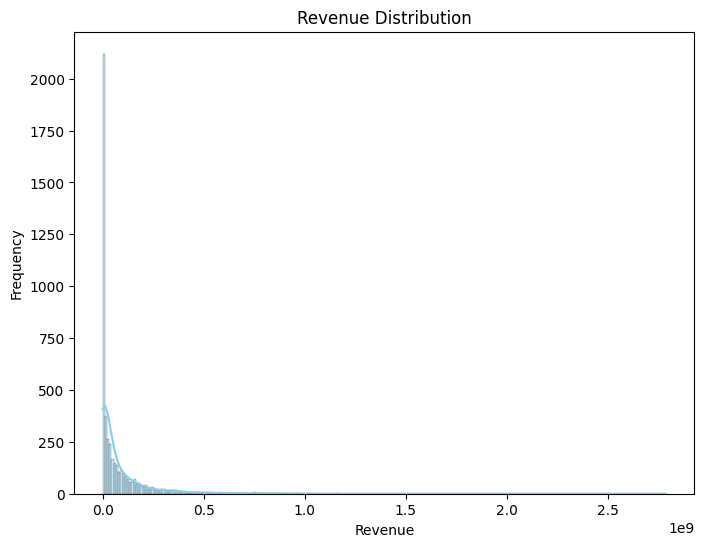

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df['revenue'], kde=True, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

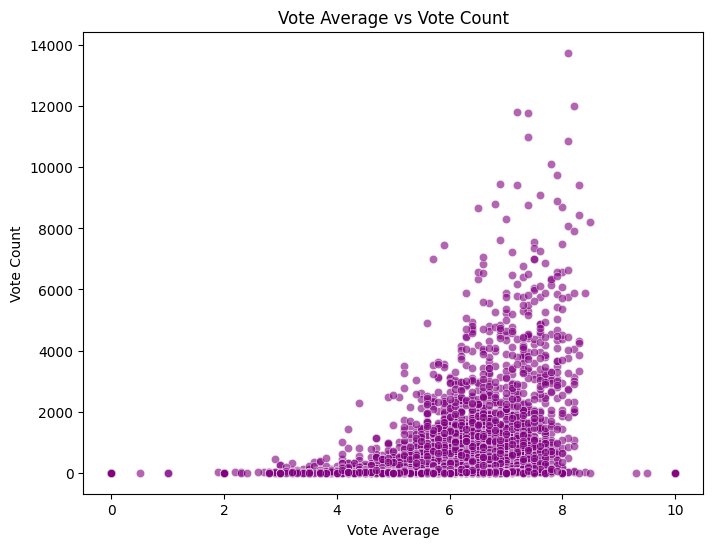

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='vote_average', y='vote_count', data=df, alpha=0.6, color='purple')
plt.title('Vote Average vs Vote Count')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.show()

In [24]:
df['has_tagline'] = df['tagline'].notna().astype(int)

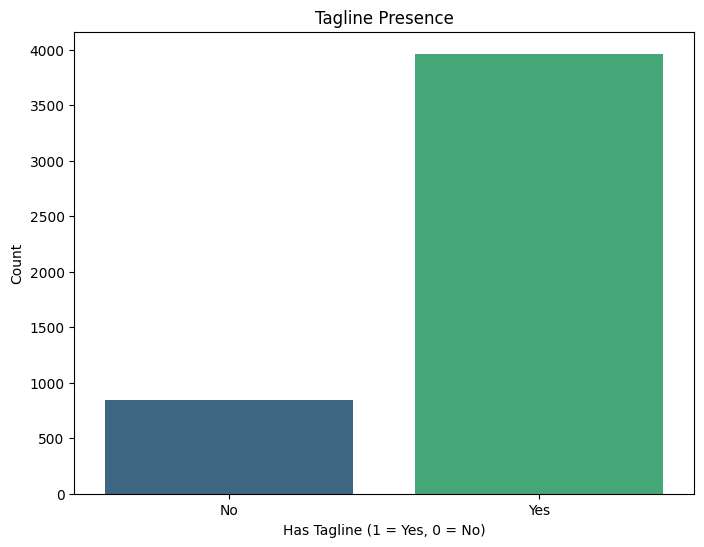

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='has_tagline', data=df, palette='viridis')
plt.title('Tagline Presence')
plt.xlabel('Has Tagline (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [26]:
df = df[['movie_id','title','overview','genres','keywords','cast','crew']]
df.shape
df.isnull().sum()
df.duplicated().sum()

0

In [27]:
df = df[['movie_id','title','overview','genres','keywords','cast','crew']]
print(df.shape)
print(df.isnull().sum())
print(df.duplicated().sum())

(4809, 7)
movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64
0


In [28]:
def convert(text):
    return [i['name'] for i in ast.literal_eval(text)]

def get_director(text):
    data = ast.literal_eval(text)
    for item in data:
        if item['job'] == 'Director':
            return [item['name']]
    return []

def remove_spaces(words):
    return [word.replace(" ", "") for word in words]

df.dropna(inplace=True)

df['genres'] = df['genres'].apply(convert)
df['keywords'] = df['keywords'].apply(convert)

df['cast'] = df['cast'].apply(lambda x: convert(x)[:3])

df['crew'] = df['crew'].apply(get_director)

df['cast'] = df['cast'].apply(remove_spaces)
df['crew'] = df['crew'].apply(remove_spaces)
df['genres'] = df['genres'].apply(remove_spaces)
df['keywords'] = df['keywords'].apply(remove_spaces)
df['overview'] = df['overview'].apply(lambda x: x.split())
df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [29]:
df['tags'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']

new_df = df.drop(columns=['overview', 'genres', 'keywords', 'cast', 'crew'])

In [30]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))
new_df.head(2)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."


In [31]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
vector = tfidf.fit_transform(new_df['tags']).toarray()

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [33]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print("\t",new_df.iloc[i[0]].title)

In [34]:
fav=input("Enter a movie name:")
print("\nMovies similar to ",fav,":\n")
recommend(fav)


Movies similar to  Interstellar :

	 Apollo 13
	 Space Pirate Captain Harlock
	 Space Cowboys
	 The Martian
	 Moonraker
